In [5]:
import numpy as np
from plot_trajectory_2d import plot_levels, plot_trajectory
import scipy
from matplotlib import pyplot as plt
from datetime import datetime
import optimization
import oracles
from oracles import QuadraticOracle
from optimization import gradient_descent

## Эксперимент 1

Посмотрим на поведение метода градиентного спуска в зависимости от выбора начальной точки.

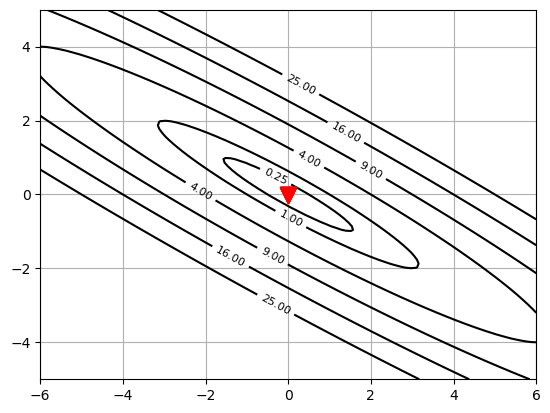

In [7]:
oracle = QuadraticOracle(np.array([[2.0, 3.0], [3.0, 5.0]]), np.zeros(2))
[x_star, msg, history] = gradient_descent(oracle, np.array([0.01,0.01]), trace=True)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

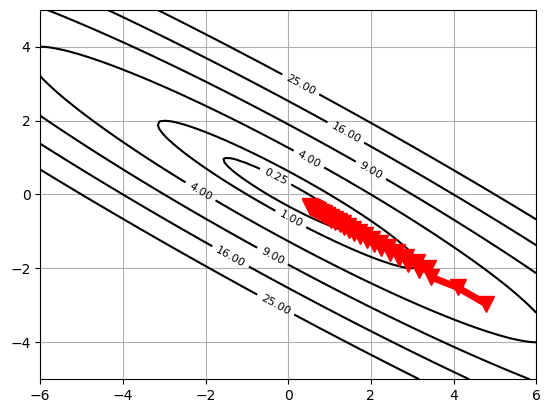

In [8]:
[x_star, msg, history] = gradient_descent(oracle, np.array([8, 2]), trace=True)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

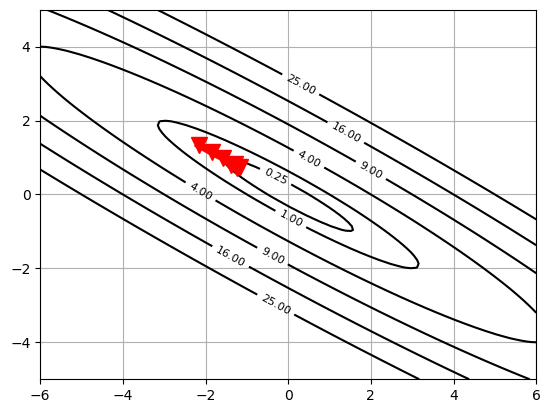

In [9]:
[x_star, msg, history] = gradient_descent(oracle, np.array([-8, -8]), trace=True)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

Посмотрим на поведение метода градиентного спуска в зависимости от стратегии выбора шага.

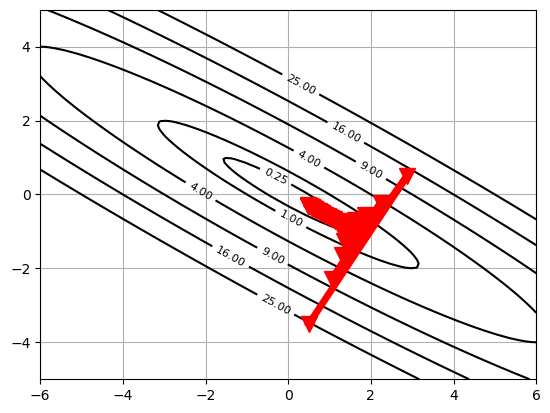

In [10]:
# стратегии выбора шага - Armijo
[x_star, msg, history] = gradient_descent(oracle, np.array([4, 2]), line_search_options={'method': 'Armijo'}, trace=True)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

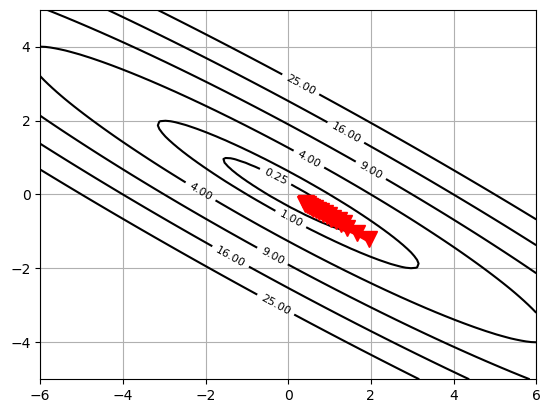

In [11]:
# стратегии выбора шага - Wolfe
[x_star, msg, history] = gradient_descent(oracle, np.array([4, 2]), line_search_options={'method': 'Wolfe'}, trace=True)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

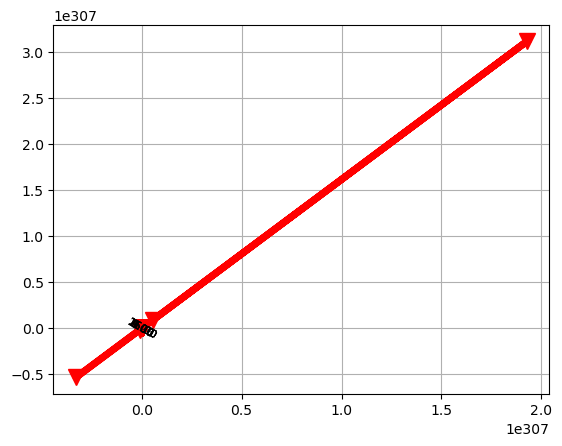

In [12]:
# стратегии выбора шага - Constant
[x_star, msg, history] = gradient_descent(oracle, np.array([4, 2]), line_search_options={'method': 'Constant'}, trace=True)
plot_levels(oracle.func)
plot_trajectory(oracle.func, history['x'])

## Эксперимент 2

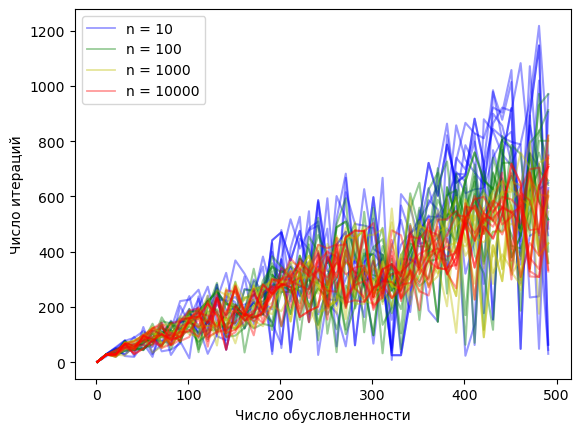

In [13]:
# словарь размерность - цвет на графике
n_param = {10:'b', 100:'g', 1000:'y', 10000:'r'}

# число обусловленности
k_param = np.arange(1, 501, 10)

# random_seeds для повторения эксперимента
random_seeds = np.random.randint(1, 500, 10)

plt.xlabel('Число обусловленности')
plt.ylabel('Число итераций')

for n in n_param.keys():
    T_mean = np.zeros(len(k_param))
    for random_seed in random_seeds:
        np.random.seed(random_seed)
        T = []
        for k in k_param:
            elements = np.random.randint(1, k + 1, n)
            elements[0],elements[1] = 1, k
            A = scipy.sparse.diags(elements, 0)
            b = np.random.rand(n)
            oracle = oracles.QuadraticOracle(A, b)
            [x_star, msg, history] = optimization.gradient_descent(oracle,np.zeros(n),trace=True)
            T.append(len(history['grad_norm']))

        T_mean += np.array(T)
        plt.plot(k_param, T, n_param[n], alpha=0.4)

    T_mean = T_mean / len(random_seeds)
    plt.plot(k_param, T_mean, n_param[n], linewidth=1.3, label='n = '+str(n), alpha=0.4) 
plt.legend()
plt.savefig('experiment2.png', dpi=150)

## Эксперимент 3

In [2]:
from sklearn.datasets import load_svmlight_file

# читаем файл
A, b = load_svmlight_file('w8a')
# логистическая регрессия
oracle = oracles.create_log_reg_oracle(A, b, 1 / b.size)
# начальная точка
x_0 = np.zeros(A.shape[1])
# оптимизация двумя методами
[x_star_grad_des, msg_grad_des, history_grad_des] = optimization.gradient_descent(oracle, x_0, trace=True)
[x_star_newton, msg_newton, history_newton] = optimization.newton(oracle, x_0, trace=True)
# строим график зависимость значения функции от времени работы  
plt.plot(history_grad_des['time'], history_grad_des['func'], label="Градиентный спуск")
plt.plot(history_newton['time'], history_newton['func'], label="Ньютон")
plt.xlabel('Время')
plt.ylabel('Значение функции')
plt.legend()
plt.savefig('w8a_res_f.png')
plt.clf()
#
grad_0 = oracle.grad(x_0)
history_grad_des_norm = np.array([np.linalg.norm(i)**2 for i in history_grad_des['grad_norm']])
history_newton_norm = np.array([np.linalg.norm(i)**2 for i in history_newton['grad_norm']])
grad_des = history_grad_des_norm / np.linalg.norm(grad_0)**2
newton = history_newton_norm / np.linalg.norm(grad_0)**2
plt.plot(history_grad_des['time'], grad_des, label="Градиентный спуск")
plt.plot(history_newton['time'], newton, label="Ньютон")
plt.xlabel('Время')
plt.ylabel('Относительный квадрат нормы градиента')
plt.legend()
plt.savefig('w8a_res_grad.png')
plt.clf()


<Figure size 640x480 with 0 Axes>